In [13]:
import torch
import numpy as np
import pandas as pd
from torch.utils import data
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [15]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [16]:
dataset.isna().sum()
dataset = dataset.dropna()

# Change location categories
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [17]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print("shape of train_dataset: ", train_dataset.shape)
print("shape of test_dataset: ", test_dataset.shape)

shape of train_dataset:  (314, 10)
shape of test_dataset:  (78, 10)


In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
print("shape of train_features: ", train_features.shape)
print("shape of test_features: ", test_features.shape)
print("shape of train_labels: ", train_labels.shape)
print("shape of test_labels: ", test_labels.shape)

shape of train_features:  (314, 9)
shape of test_features:  (78, 9)
shape of train_labels:  (314,)
shape of test_labels:  (78,)


In [19]:
batch = 10
X =np.array(train_features.values.astype(np.float32))
X = torch.Tensor(X)
print(X.shape)
y = np.array(train_labels.values.astype(np.float32))
y = torch.Tensor(y)
print("before reshape: ", y.shape)
y = torch.reshape(y, (-1,1))
print("after reshape: ", y.shape)

train = TensorDataset(X,y)
train_dataloader = DataLoader(train, batch_size=batch, shuffle=True)
sample = next(iter(train_dataloader))
print("sample batch: ", sample)
print("batch len: ", len(sample))

for X, y in train_dataloader:
    print(f"Shape of X [B, F]: {X.shape}")
    print(f"Shape of y [B, L]: {y.shape} {y.dtype}")
    break

torch.Size([314, 9])
before reshape:  torch.Size([314])
after reshape:  torch.Size([314, 1])
sample batch:  [tensor([[4.0000e+00, 9.8000e+01, 6.5000e+01, 2.3800e+03, 2.0700e+01, 8.1000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 1.2100e+02, 1.1000e+02, 2.6000e+03, 1.2800e+01, 7.7000e+01,
         1.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.0000e+00, 9.1000e+01, 6.8000e+01, 2.0250e+03, 1.8200e+01, 8.2000e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00],
        [4.0000e+00, 9.8000e+01, 8.0000e+01, 1.9150e+03, 1.4400e+01, 7.9000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 9.1000e+01, 6.7000e+01, 1.9950e+03, 1.6200e+01, 8.2000e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00],
        [4.0000e+00, 9.1000e+01, 6.7000e+01, 1.8500e+03, 1.3800e+01, 8.0000e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00],
        [6.0000e+00, 1.7300e+02, 1.1500e+02, 2.5950e+03, 1.1300e+01, 7.9000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
  

In [20]:
X =np.array(test_features.values.astype(np.float32))
X = torch.Tensor(X)
y = np.array(test_labels.values.astype(np.float32))
y = torch.Tensor(y)
y = torch.reshape(y, (-1,1))
test = TensorDataset(X,y)
test_dataloader = DataLoader(test, batch_size=batch, shuffle=True)
sample = next(iter(test_dataloader))
print("sample batch: ", sample[0])
print("batch len: ", len(sample))

for X, y in test_dataloader:
    print(f"Shape of X [B, F]: {X.shape}")
    print(f"Shape of y [B, L]: {y.shape} {y.dtype}")
    break

sample batch:  tensor([[4.0000e+00, 8.5000e+01, 5.2000e+01, 2.0350e+03, 2.2200e+01, 7.6000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [6.0000e+00, 2.0000e+02, 8.5000e+01, 3.0700e+03, 1.6700e+01, 7.8000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [8.0000e+00, 3.5100e+02, 1.4200e+02, 4.0540e+03, 1.4300e+01, 7.9000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [6.0000e+00, 2.2500e+02, 9.0000e+01, 3.3810e+03, 1.8700e+01, 8.0000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 1.0500e+02, 7.4000e+01, 2.1900e+03, 1.4200e+01, 8.1000e+01,
         1.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.0000e+00, 2.3200e+02, 1.0000e+02, 2.6340e+03, 1.3000e+01, 7.1000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [6.0000e+00, 2.3200e+02, 9.0000e+01, 3.0850e+03, 1.7600e+01, 7.6000e+01,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [4.0000e+00, 7.9000e+01, 6.7000e+01, 1.9500e+03, 1.9000e+01, 7.4000e+01,
         0.0000

In [39]:
class NNModel(nn.Module):
    def __init__(self):
        #super(NNModel, self).__init__()
        super().__init__()
        self.norm = nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9,1)


    def forward(self, x):
        t = self.norm(x)
        t = self.fc1(t)
        return t
    
class NNModel2(nn.Module):
    def __init__(self):
        #super(NNModel, self).__init__()
        super().__init__()
        self.norm = nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9,10)
        self.fc2 = nn.Linear(10,20)
        self.fc3 = nn.Linear(20,10)
        self.fc4 = nn.Linear(10,1)
        self.relu = nn.ReLU()


    def forward(self, x):
        t = self.norm(x)
        t = self.fc1(t)
        t = self.relu(t)
        t = self.fc2(t)
        t = self.relu(t)
        t = self.fc3(t)
        t = self.relu(t)
        t = self.fc4(t)
        return t
    
class NNModel3(nn.Module):
    def __init__(self):
        #super(NNModel, self).__init__()
        super().__init__()
        self.norm = nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9,10)
        self.fc2 = nn.Linear(10,20)
        self.fc3 = nn.Linear(20,30)
        self.fc4 = nn.Linear(30,20)
        self.fc5 = nn.Linear(20,1)
        self.relu = nn.ReLU()


    def forward(self, x):
        t = self.norm(x)
        t = self.fc1(t)
        t = self.relu(t)
        t = self.fc2(t)
        t = self.relu(t)
        t = self.fc3(t)
        t = self.relu(t)
        t = self.fc4(t)
        t = self.relu(t)
        t = self.fc5(t)
        return t

In [40]:
nnet1 = NNModel()
nnet2 = NNModel2()
nnet3 = NNModel3()

criterion = nn.MSELoss()
optimizer1 = optim.Adam(nnet1.parameters(), lr=0.01)
optimizer2 = optim.Adam(nnet2.parameters(), lr=0.01)
optimizer3 = optim.Adam(nnet3.parameters(), lr=0.01)

# from torchinfo import summary
# batch = 10
# summary(nnet1, input_size=(batch, 9), device='cpu', col_names=['input_size', 'output_size',
#                                                               'num_params'])

In [41]:
def train(dataloader, model, loss_fn, optimizer, device,train_losses):
    train_loss = 0
    size = len(dataloader.dataset)
    # print("size: ", size)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        #print("X: " , X)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss += loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    train_loss = train_loss/size
    train_losses.append(train_loss)

def test(dataloader, model, loss_fn, device):
    accuracy = 0
    size = len(dataloader.dataset)
    # print("size: ", size)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct,mse = 0, 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    
    mse = test_loss / size
    test_loss /= num_batches
    accuracy = 100-mse
    print(f"Test Error: \n Accuracy: {accuracy:4f}%, Avg loss: {test_loss:>8f} \n")

Epoch 1
-------------------------------
Train loss: 553.235962  [   10/  314]
Train loss: 817.734314  [  110/  314]
Train loss: 440.498016  [  210/  314]
Train loss: 344.672974  [  310/  314]
Test Error: 
 Accuracy: 39.292056%, Avg loss: 591.902458 

Epoch 2
-------------------------------
Train loss: 433.318176  [   10/  314]
Train loss: 440.869476  [  110/  314]
Train loss: 329.100861  [  210/  314]
Train loss: 513.413757  [  310/  314]
Test Error: 
 Accuracy: 46.409461%, Avg loss: 522.507755 

Epoch 3
-------------------------------
Train loss: 484.227051  [   10/  314]
Train loss: 789.686768  [  110/  314]
Train loss: 420.183838  [  210/  314]
Train loss: 279.059540  [  310/  314]
Test Error: 
 Accuracy: 53.369102%, Avg loss: 454.651253 

Epoch 4
-------------------------------
Train loss: 584.829407  [   10/  314]
Train loss: 395.937134  [  110/  314]
Train loss: 430.719635  [  210/  314]
Train loss: 232.570267  [  310/  314]
Test Error: 
 Accuracy: 62.902043%, Avg loss: 361.70508

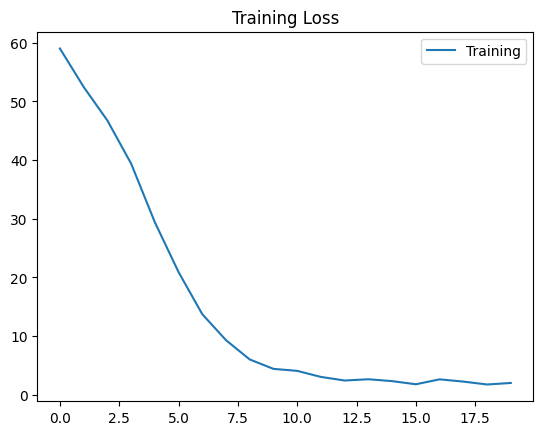

In [42]:
device = 'cpu'
device = mps_device
epochs = 20

train_losses = []
# Train NN1
nnet1 = nnet1.to(device=device)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, nnet1, criterion, optimizer1, device,train_losses)
    test(test_dataloader, nnet1, criterion, device)
print("Done!")


# Plot losses
total_losses = sum(train_losses)
len_losses = len(train_losses)
plt.title('Training Loss')
plt.plot(train_losses, label='Training')
print("Mean validation loss: {:4f}".format(total_losses/len_losses))
plt.legend()
plt.show()

Epoch 1
-------------------------------
Train loss: 655.825256  [   10/  314]
Train loss: 990.936035  [  110/  314]
Train loss: 553.794434  [  210/  314]
Train loss: 156.357773  [  310/  314]
Test Error: 
 Accuracy: 89.960734%, Avg loss: 97.882846 

Epoch 2
-------------------------------
Train loss: 62.844948  [   10/  314]
Train loss: 94.310242  [  110/  314]
Train loss: 41.489578  [  210/  314]
Train loss: 26.261465  [  310/  314]
Test Error: 
 Accuracy: 97.660538%, Avg loss: 22.809754 

Epoch 3
-------------------------------
Train loss: 8.280110  [   10/  314]
Train loss: 27.508490  [  110/  314]
Train loss: 16.054476  [  210/  314]
Train loss: 13.164756  [  310/  314]
Test Error: 
 Accuracy: 98.010121%, Avg loss: 19.401319 

Epoch 4
-------------------------------
Train loss: 28.491697  [   10/  314]
Train loss: 38.869385  [  110/  314]
Train loss: 25.086185  [  210/  314]
Train loss: 8.397590  [  310/  314]
Test Error: 
 Accuracy: 97.738616%, Avg loss: 22.048496 

Epoch 5
------

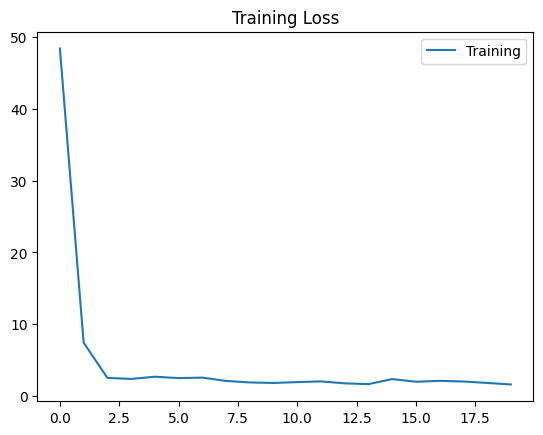

In [43]:
# Train NN2
train_losses = []
nnet2 = nnet2.to(device=device)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, nnet2, criterion, optimizer2, device,train_losses)
    test(test_dataloader, nnet2, criterion, device)
print("Done!")


# Plot losses
total_losses = sum(train_losses)
len_losses = len(train_losses)
plt.title('Training Loss')
plt.plot(train_losses, label='Training')
print("Mean validation loss: {:4f}".format(total_losses/len_losses))
plt.legend()
plt.show()

Epoch 1
-------------------------------
Train loss: 533.381042  [   10/  314]
Train loss: 673.386414  [  110/  314]
Train loss: 92.633049  [  210/  314]
Train loss: 207.740234  [  310/  314]
Test Error: 
 Accuracy: 97.377060%, Avg loss: 25.573666 

Epoch 2
-------------------------------
Train loss: 6.536356  [   10/  314]
Train loss: 17.719072  [  110/  314]
Train loss: 15.809990  [  210/  314]
Train loss: 55.801422  [  310/  314]
Test Error: 
 Accuracy: 98.245293%, Avg loss: 17.108394 

Epoch 3
-------------------------------
Train loss: 31.780104  [   10/  314]
Train loss: 103.617027  [  110/  314]
Train loss: 46.051189  [  210/  314]
Train loss: 29.042593  [  310/  314]
Test Error: 
 Accuracy: 98.149648%, Avg loss: 18.040930 

Epoch 4
-------------------------------
Train loss: 37.628399  [   10/  314]
Train loss: 25.468073  [  110/  314]
Train loss: 15.648882  [  210/  314]
Train loss: 13.458481  [  310/  314]
Test Error: 
 Accuracy: 98.992461%, Avg loss: 9.823505 

Epoch 5
------

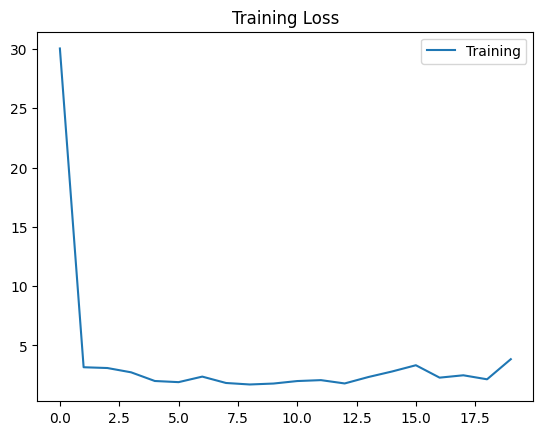

In [44]:
# Train NN3
train_losses = []
nnet3 = nnet3.to(device=device)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, nnet3, criterion, optimizer3, device,train_losses)
    test(test_dataloader, nnet3, criterion, device)
print("Done!")



# Plot losses
total_losses = sum(train_losses)
len_losses = len(train_losses)
plt.title('Training Loss')
plt.plot(train_losses, label='Training')
print("Mean validation loss: {:4f}".format(total_losses/len_losses))
plt.legend()
plt.show()

In [ ]:
We can see that overall, neural network 3 achieved the least amount of average validation loss. We can also see that neural network 1 always starts out very poorly, but reaches great accuracy later in training while neural network 1 and 2 start out with great accuracy and only get better.